In [1]:
# Importing Libs
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

In [2]:
# Dataset
df = pd.read_csv('/home/fawwazh/Documents/dataset_housing_price/archive/Housing.csv')

print(df.head())
print(df.tail())

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7229300521  20141013T000000  231300.0         2       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
# for target
target = ['price']
y = df[target]

# for features
X = df.drop(['id', 'date', 'price'], axis=1)

In [5]:
# Splitting data (80% for training and 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Train polynomial regression model
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predict
y_pred = model.predict(X_test_poly)

In [26]:
# Rating
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('mse:', mse)
print('r2 score:', r2)

mse: 30548007710.63687
r2 score: 0.7979317895289698


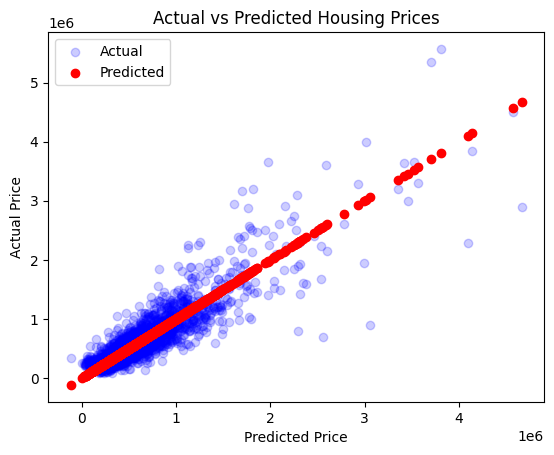

In [27]:
# Plotting
plt.scatter(y_pred, y_test, color='blue', alpha=0.2, label='Actual') 
plt.scatter(y_pred, y_pred, color='red', label='Predicted') 
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.legend()
plt.title('Actual vs Predicted Housing Prices')
plt.show()

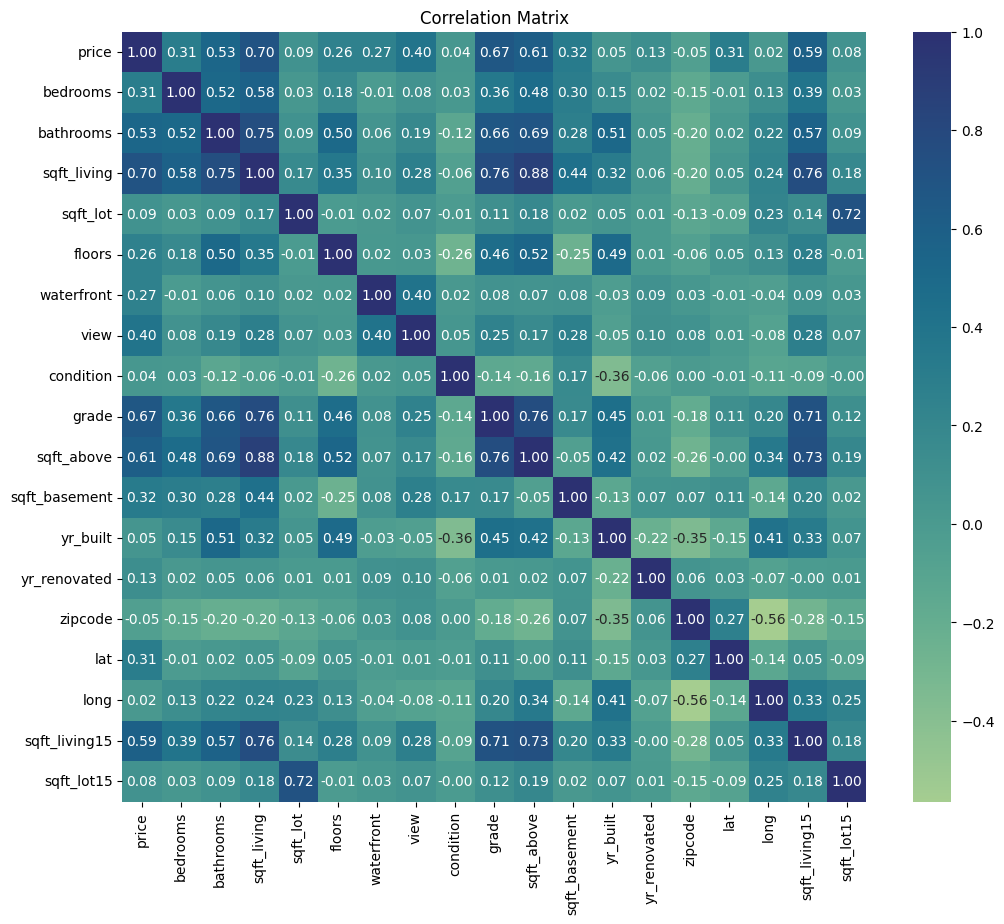

In [31]:
# Corellation Matrix
data = df.drop(['id', 'date'], axis=1)
correlation_matrix = data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='crest')
plt.title("Correlation Matrix")
plt.show()

In [32]:
def recommendation(budget, min_bedrooms, min_bathrooms, min_sqft_living, floors):
    recommended = data[
    (data['price'] <= budget) &
    (data['bedrooms'] <= min_bedrooms) & 
    (data['bathrooms'] <= min_bathrooms) &
    (data['sqft_living'] >= min_sqft_living) &
    (data['floors'] == floors)
    ].sort_values(by='price', ascending=True)
    
    return recommended


recommended_catalog = recommendation(budget=150000, min_bedrooms=3, min_bathrooms=2, min_sqft_living=150, floors=2)
print(recommended_catalog)

          price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
18939   90000.0         3       1.00          980      2490     2.0   
18332  130000.0         3       1.00         1200      7000     2.0   
2589   134000.0         2       1.50          980      5000     2.0   
10105  139500.0         2       1.50         1230      1561     2.0   
15610  140000.0         3       1.75         1270      8991     2.0   
18988  140000.0         3       1.50         1200      2002     2.0   
11255  150000.0         2       1.50         1360      1934     2.0   

       waterfront  view  condition  grade  sqft_above  sqft_basement  \
18939           0     0          4      6         980              0   
18332           0     0          1      7        1200              0   
2589            0     0          3      7         980              0   
10105           0     0          3      7        1230              0   
15610           0     0          3      7        1270              0   